The gradient descent algorithm and its variants are some of the most widely used optimization algorithms in machine learning today. In this post a super simple example of gradient descent will be implemented.<!--more-->

## Example

We will use the simple function $L(x)=x^2$, and call it our *loss function*.

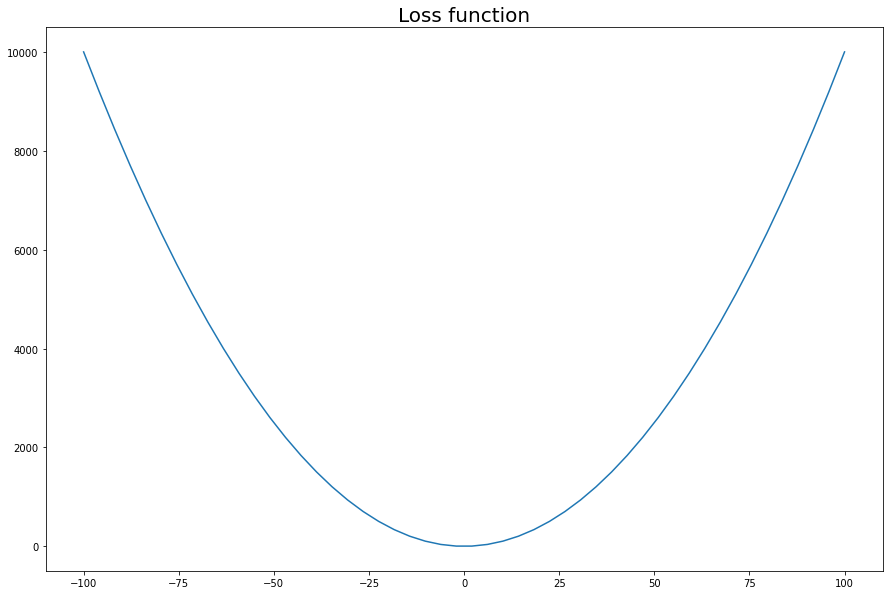

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The maximum and minimum value of the function.
M = 100

# The loss function.
L = lambda x: x**2

fig = plt.figure(0, figsize=(15, 10))
theta = np.linspace(-M, M)
plt.plot(theta, L(theta))
_ = plt.title('Loss function', size=20)

## Algorithm

The derivative of $L(\theta)=\theta^2$ wrt. x is $\frac{\partial}{\partial \theta}L(\theta)=2\theta$. The gradient descent algorithm goes as follow:


1. **Initiate** $\theta_0\in\mathbb{R}, \eta\in\mathbb{R}$.

    1.1. **Update**: $\theta_{t+1} = \theta_t - \eta \frac{\partial}{\partial \theta} L(\theta_t)$.
    
    1.2. **Stop**: If stopping criterium is satisfied.
    
Intuitively one takes a small step in the direction of steepest local descent. Lets implement some helper functions to simulate the algorithm.

In [16]:
def simulate_gradient_descent(theta_0, eta, max_iter=100):
    """Simulate the next gradient by running the algorithm.
    
    Args:
        theta_0 (float): The initial value of theta.
        eta (float): The learning rate.
        max_iter (int): The maximum number of iterations.
    
    Returns:
        List[float]: A list of thetas walked by the algorithm.
    """

    # Save the results in below
    thetas = np.zeros(max_iter + 1)
    
    # The derivative of x**2
    dL = lambda x : 2 * x

    # 1. Initiate
    thetas[0] = M

    for t in range(max_iter):

        # 1.1. Update
        thetas[t + 1] = thetas[t] - eta * dL(thetas[t])
    
    return thetas

def plot(theta_path, eta):
    """Plot the path walked by the algorithm.
    
    Args:
        theta_path (List[float]): A list of thetas walked by the algorithm.
        eta (float): The learning rate.
    """
    plt.plot(theta, L(theta))
    plt.plot(theta_path, L(theta_path), label=eta)
    plt.legend(prop={'size': 15})

## Results

Lets plot the path of the gradient descent algorithm.

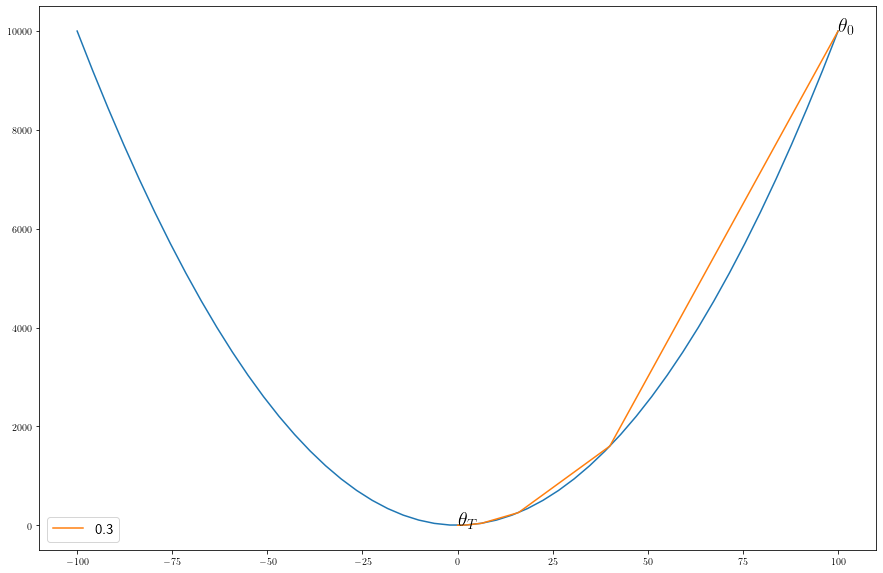

In [17]:
eta = 0.3
theta_path = simulate_gradient_descent(M, eta)

fig = plt.figure(1, figsize=(15, 10))
plt.rc('text', usetex=True)
plot(theta_path, eta)
plt.text(theta_path[0], L(theta_path[0]), r'$\theta_0$', size = 20)
plt.text(theta_path[-1], L(theta_path[-1]), r'$\theta_T$', size = 20)
plt.show()

It takes small steps with small $\eta$ and large steps with large $\eta$.

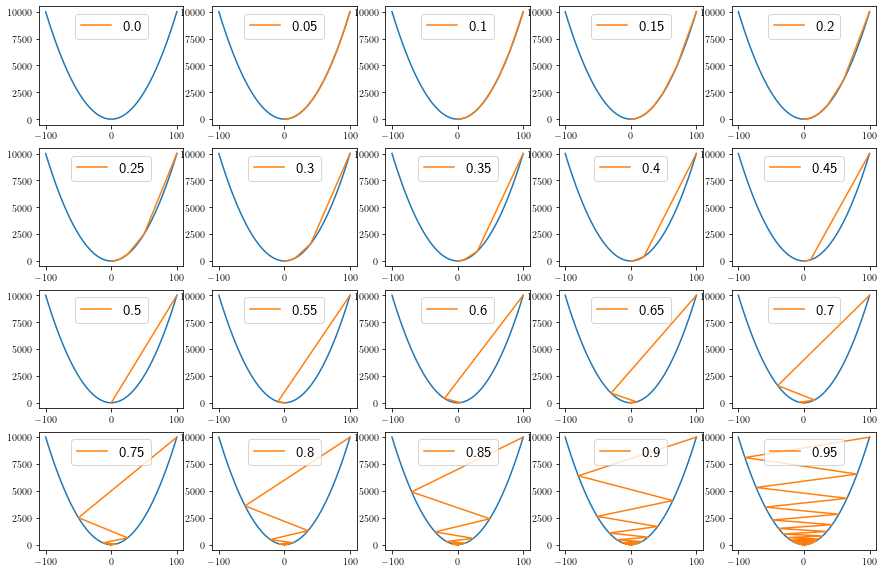

In [18]:
fig = plt.figure(1, figsize=(15, 10))

for idx, eta in enumerate(np.arange(0, 1, 0.05)):
    plt.subplot(4, 5, idx + 1)
    eta = round(eta, 3)
    theta_path = simulate_gradient_descent(M, eta)
    plot(theta_path, eta)

With $\eta>1$ it occilates to infinity.

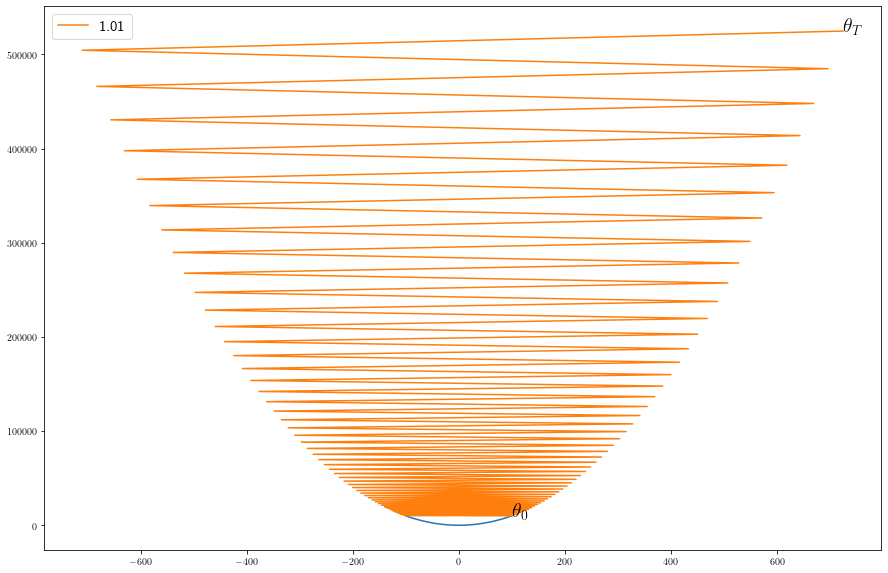

In [19]:
fig = plt.figure(1, figsize=(15, 10))

eta = 1.01
theta_path = simulate_gradient_descent(M, eta)
plot(theta_path, eta)
_ = plt.text(theta_path[0], L(theta_path[0]), r'$\theta_0$', size = 20)
_ = plt.text(theta_path[-1], L(theta_path[-1]), r'$\theta_T$', size = 20)

## Intuition

The intuition of gradient descent is that in each iteration of the **update** step one does a local linear approximation of the loss function, a 1st order Taylor expansion of $L(\theta+d)$ around $d=0$, that is for $d\in\mathbb{R}, \theta_t\in\mathbb{R}$

$$
\begin{align}
    L(\theta_t+d) &\approx L(\theta_t) + \frac{\partial L(\theta_t+d)}{\partial d}(0) \cdot (d - 0) \\
    &= L(\theta_t) + \frac{\partial (\theta_t + d)}{\partial d}(0) \frac{\partial L(x)}{\partial x}(\theta_t+0) \cdot (d - 0)  && \text{Chain rule.} \\
    &= L(\theta_t) + \frac{\partial L(x)}{\partial x} (\theta_t) \cdot d
\end{align}
$$

Using this local approximation one sees that $L$ is minimized in the direction of the negative gradient $d=-\frac{\partial L(x)}{\partial x} (\theta_t)$. 

The reason why the algorithm has the stepsize $\eta$ is intuitvely because the local linear approximation only works well around a neighbourhood of $\theta_t$.

## Higher Dimensions

This also holds in higher dimensions where the approximation is $d\in\mathbb{R^d}, \theta_t\in\mathbb{R^d}$

$$
\begin{align}
    L(\theta_t+d) \approx L(\theta_t) + \nabla L(\theta_t)^T d
\end{align}
$$

Restricting $\lVert d\rVert=1$ then one can see by Cauchy-Schwarz inequality that

$$
\begin{align}
    \nabla L(\theta_t)^T d & \geq - \lvert \nabla L(\theta_t)^T d \rvert \\
    & \geq - \lVert \nabla L(\theta_t) \rVert \lVert d \rVert && \text{Cauchy Schwarz.} \\
        &= \nabla L(\theta_t)^T\frac{- \nabla L(\theta_t)}{\lVert\nabla L(\theta_t)\rVert}
\end{align}
$$

So $\nabla L(\theta_t)^T d \geq \nabla L(\theta_t)^T d^\star$ where $d^\star=\frac{-\nabla L(\theta_t)}{\lVert\nabla L(\theta_t)\rVert}$, therefore $-\nabla L(\theta_t)$ is the local direction which minimizes the loss function. 

Gradient descent applies this local approximation and moves along the negative gradient in each iteration. 

$$
\theta_{t+1} = \theta_t - \eta \nabla L(\theta_t)
$$

The $\eta$ is often called the *learning rate*. It is a tuning parameter, that controls how far the algorithm steps along the negative gradient.